In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projeto-ml/sms/spam.csv', encoding='latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5440,ham,Thank you. do you generally date the brothas?,NaN,NaN,NaN
3898,ham,ÌÏ mean it's confirmed... I tot they juz say o...,NaN,NaN,NaN
2281,ham,"I hav almost reached. Call, i m unable to conn...",NaN,NaN,NaN
1583,ham,"It's cool, let me know before it kicks off aro...",NaN,NaN,NaN
706,ham,So when do you wanna gym harri,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

# **LIMPEZA DE DADOS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Remover as 3 colunas nulas

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
4368,ham,Anytime lor...
3422,spam,Had your mobile 10 mths? Update to latest Oran...
3509,ham,I just saw ron burgundy captaining a party boa...
3861,ham,"Customer place, i wil cal u sir."
1430,ham,Don't look back at the building because you ha...


In [ ]:
# Renomear as colunas
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
786,ham,It does it on its own. Most of the time it fix...
4850,ham,Gain the rights of a wife.dont demand it.i am ...
3969,ham,That's the trouble with classes that go well -...
4827,ham,Lol no. Just trying to make your day a little ...
3835,ham,Then Ì_ come n pick me at 530 ar?


In [ ]:
# Utilizar funções da biblioteca sklearn para converter rótulos em categorias numericas.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# SPAM E HAM agora serão classificados com 0 e 1
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Verificar valores nulos
df.isnull().sum()

,0
target,0
text,0


In [ ]:
# Verificar valores duplicados
df.duplicated().sum()

403

In [ ]:
# Remover valores duplicados
df = df.drop_duplicates(keep='first')


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

# **ANÁLISE EXPLORATORIA**

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


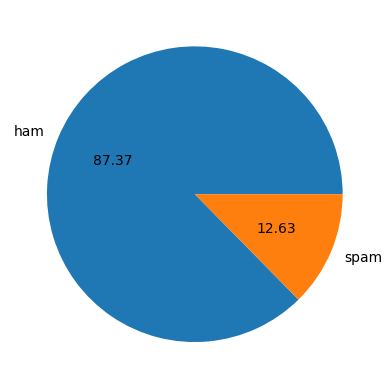

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# A base de dados não está balanceada

In [ ]:
# Para trabalhar com o processamento de linguagem natural- utilizaremos a biblioteca nltk.
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Contando o números de caractéries em cada mensagem
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Contar número de palavras em cada mensagem
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Contar números e setenças em cada mensagem
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# HAM (Não Spam) - Analise das novas features.
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# SPAM- Analise das novas features.
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

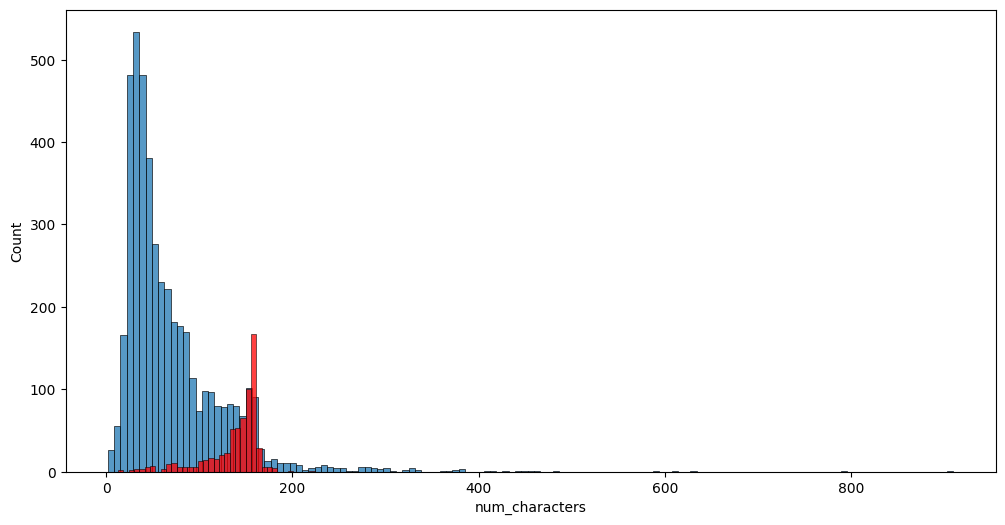

In [ ]:
# Plotar um histograma para comparar a distribuição dos caracteres em cada classe.
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

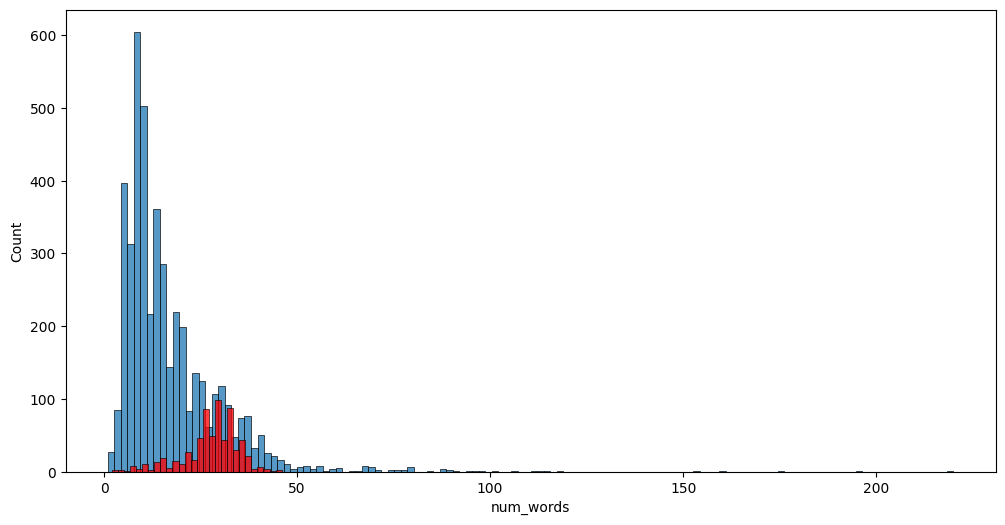

In [ ]:
# Plotar um histograma para comparar a distribuição das palavras em cada classe.
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

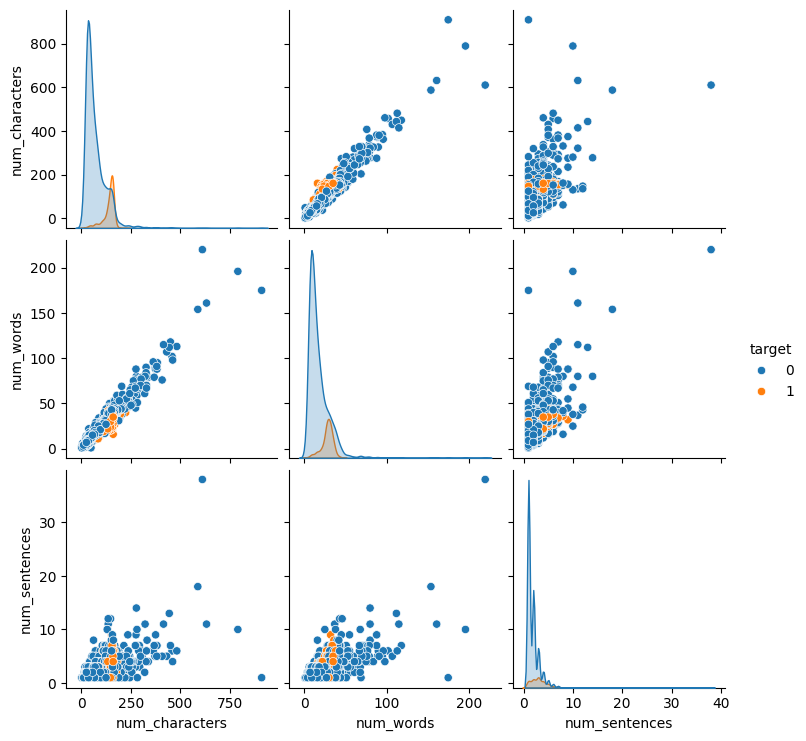

In [ ]:
sns.pairplot(df,hue='target')

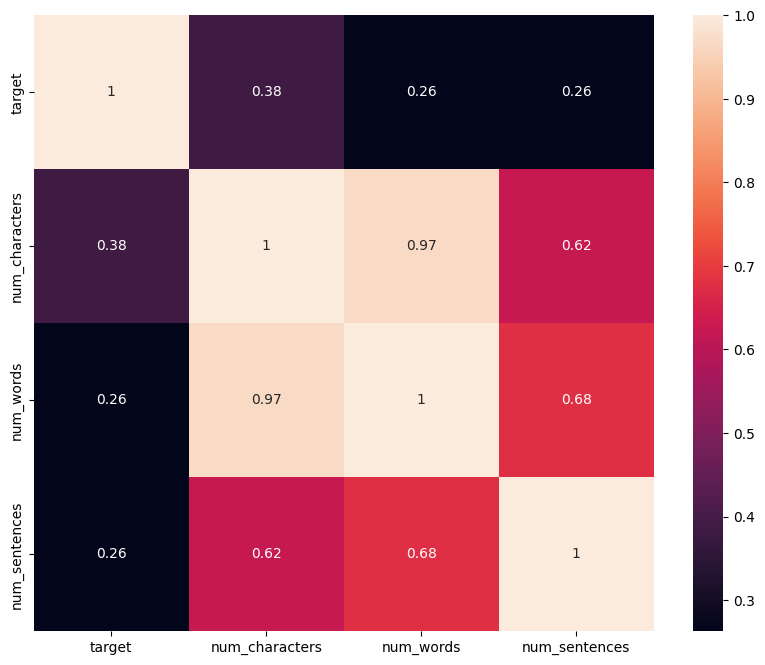

In [ ]:
df_numeric = df.drop(columns=['text'])

# Selecionar apenas as colunas numéricas restantes
df_numeric = df_numeric.select_dtypes(include=['number'])

# Calcular a matriz de correlação
corr_matrix = df_numeric.corr()

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True)
plt.show()


# **PROCESSAMENTO DA BASE**


*  Lower case
*  Tokenization
*  Removing special characters
*  Removing stop words and punctuation
*  Stemming

In [ ]:
# Aqui vamos remover palavras  comuns que geralmente não vão influenciar no significado do texto

!pip install nltk
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
# Tranformar palavras em suas raizes
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

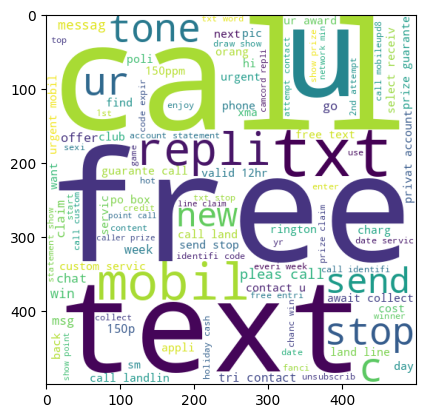

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

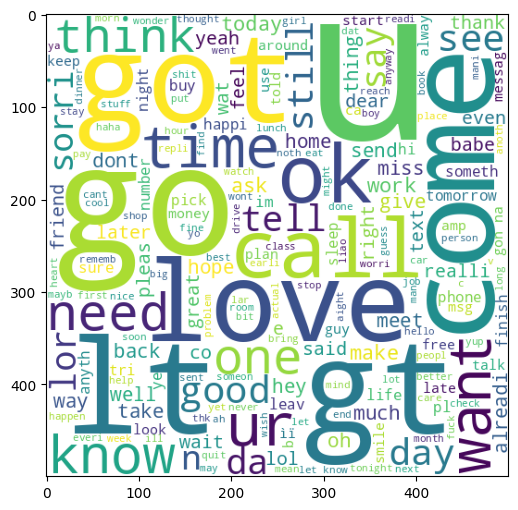

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
len(spam_corpus)

9939

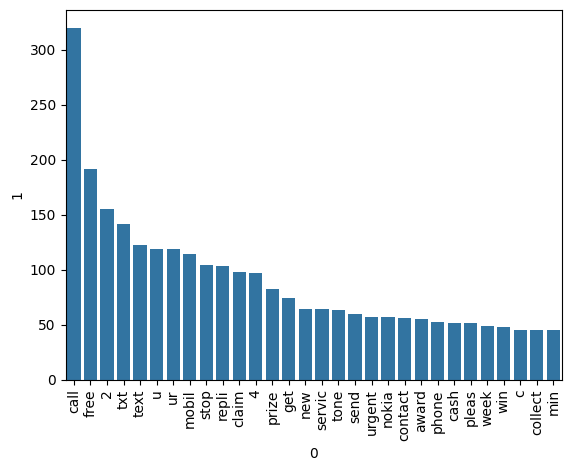

In [ ]:
# Grafico para vizualizar palavras mais comuns em mensagens spam
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

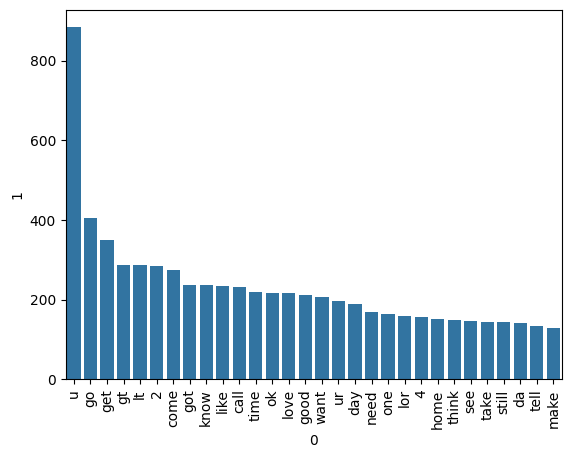

In [ ]:
# Grafico para vizualizar palavras mais comuns em mensagens ham
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# **CONSTRUÇÃO DO MODELO**

In [ ]:
# Importações necessárias
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_curve, auc
from imblearn.pipeline import make_pipeline as imblearn_make_pipeline
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Vetorizadores
cv = CountVectorizer(max_features=3000)
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
# Vetorização dos dados
X_cv = cv.fit_transform(df['transformed_text']).toarray()
X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# Combinando as características
X = np.hstack((X_cv, X_tfidf))
y = df['target'].values

In [ ]:
# Configuração da validação cruzada estratificada
stratified_kfold = StratifiedKFold(n_splits=5)

In [ ]:
# Definição do pipeline com SMOTE e Naive Bayes
pipeline = imblearn_make_pipeline(
    SMOTE(random_state=2),
    MultinomialNB()
)

In [ ]:
# Validação Cruzada Estratificada com SMOTE e Naive Bayes
cv_scores = cross_val_score(pipeline, X, y, cv=stratified_kfold, scoring='accuracy')
print("Validação Cruzada Estratificada - Accuracy média:", cv_scores.mean())
print("Validação Cruzada Estratificada - Desvio Padrão:", cv_scores.std())

Validação Cruzada Estratificada - Accuracy média: 0.9632424011489326
Validação Cruzada Estratificada - Desvio Padrão: 0.0064442444354537365


In [ ]:
# Definição da grade de hiperparâmetros para o ajuste fino
param_grid = {
    'smote__sampling_strategy': [0.5, 1.0, 'auto'],  # Alterar a estratégia de amostragem do SMOTE
    'multinomialnb__alpha': [0.1, 0.5, 1.0, 2.0, 5.0]  # Ajustar os parâmetros do Naive Bayes
}

In [ ]:
# Inicialização do GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=stratified_kfold,
    scoring='accuracy',
    n_jobs=-1  # Usar todos os núcleos disponíveis para acelerar o processo
)


In [ ]:
# Ajuste dos hiperparâmetros
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=2)),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'multinomialnb__alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
                         'smote__sampling_strategy': [0.5, 1.0, 'auto']},
             scoring='accuracy')

In [ ]:
# Melhor configuração encontrada
print("Melhor parâmetro alpha:", grid_search.best_params_['multinomialnb__alpha'])
print("Melhor parâmetro sampling_strategy:", grid_search.best_params_['smote__sampling_strategy'])


Melhor parâmetro alpha: 0.1
Melhor parâmetro sampling_strategy: 0.5


In [ ]:
# Melhor modelo encontrado
best_model = grid_search.best_estimator_

In [ ]:
# Avaliação no conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]


In [ ]:
# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy - ", accuracy)
print("Precision - ", precision)
print("F1-Score - ", f1)


Accuracy -  0.97678916827853
Precision -  0.9130434782608695
F1-Score -  0.9130434782608695


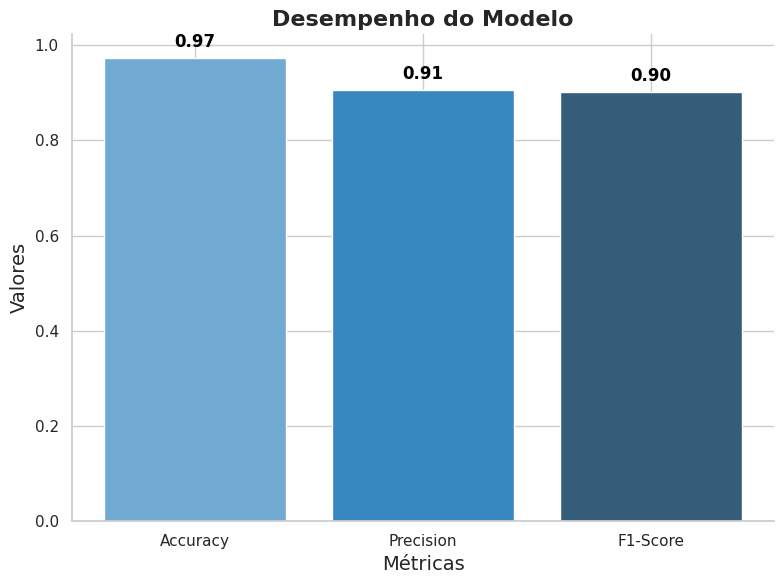

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o estilo e a paleta de cores
sns.set(style="whitegrid")
palette = sns.color_palette("Blues_d", len(metrics))

# Criando o gráfico de barras com cores modernas
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(metrics, values, color=palette)

# Adicionando rótulos e título com fontes maiores
ax.set_xlabel('Métricas', fontsize=14)
ax.set_ylabel('Valores', fontsize=14)
ax.set_title('Desempenho do Modelo', fontsize=16, fontweight='bold')

# Exibindo os valores acima de cada barra com uma formatação elegante
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Ajuste do deslocamento
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Removendo bordas do gráfico para um visual mais clean
sns.despine()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


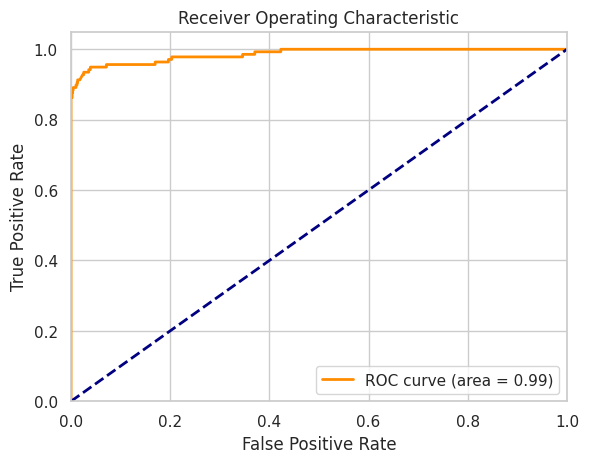

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

**STREAMLIT**

In [ ]:
# Função para prever um novo SMS
def predict_sms(sms_text):
    # Vetorizar o novo SMS
    sms_cv = cv.transform([sms_text]).toarray()
    sms_tfidf = tfidf.transform([sms_text]).toarray()
    sms_features = np.hstack((sms_cv, sms_tfidf))

    # Prever com o modelo treinado
    prediction = best_mnb.predict(sms_features)
    return "Spam" if prediction[0] == 1 else "Not Spam"

In [ ]:
# Teste prático
sms_text = input("Digite o SMS para classificar: ")
result = predict_sms(sms_text)
print("Classificação do SMS:", result)

In [ ]:
import pickle

# Salvando o modelo
with open('spam_classifier_model.pkl', 'wb') as file:
  pickle.dump(best_mnb, file)

# Salvando os vetorizadores
with open('count_vectorizer.pkl', 'wb') as file:
  pickle.dump(cv, file)

with open('tfidf_vectorizer.pkl', 'wb') as file:
  pickle.dump(tfidf, file)


test
